<h2><center><h1><center><font color='Gold'> Automatic  <font color='Green'> Ticket Classification <font color='Grey'> Assignment  <font color='Red'> :

<h5><center> By <br><br>
Farooq Ahmed  <br>
email <font color='Blue'> farooqams@hotmail.com<font color='Blue'> <br>
<h4><center> May 2022<br><br>

#### Objective of the Assignement 

###### The assignement required to build  a model that can automatically classify customer complaints based on the products and services that the ticket mentions. 


###### We will approach the problem by  assessing the significant drivers /layers and identifying the problem by Pythonic way, reducing duplcating task where possible / applicable. In addtion, using in Google Colab Pro (if Required using GPU). 

# Reset Colab Drive - Optional 

In [1]:
from google.colab import drive
drive.flush_and_unmount()
print("Data Deleted")


Data Deleted


In [2]:
!rm -rf /content/NLP_ticketing




# Version Control

In [3]:
%tensorflow_version 1.5.0
## we use version 2 since it compitable with TDQM 

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.5.0`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [4]:
import tensorflow
print(tensorflow.__version__)

1.15.2


# BenchMarking System Resources

In [5]:
import psutil
cpu = psutil.cpu_count(logical=True)
print('Your runtime has {:.0f} available CPUs\n'.format(cpu))
psutil.disk_usage('/content')

Your runtime has 4 available CPUs



sdiskusage(total=179134558208, used=41676877824, free=137440903168, percent=23.3)

In [6]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)


Wed Apr 27 17:49:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [8]:
%%time
import warnings
warnings.filterwarnings('ignore')

CPU times: user 11 µs, sys: 3 µs, total: 14 µs
Wall time: 16.9 µs


# Install Library [Not Available in Colab]

In [9]:
!pip install -U wordcloud -q 

# Import Regular Library

In [10]:
import datetime 
import numpy as np 
import pandas as pd
import json 

In [11]:
import seaborn as sns ## download for using rich sea-born theme 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

from PIL import Image

In [12]:
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

In [13]:
import tqdm
from tqdm import tqdm
from tqdm.notebook import tqdm
tqdm.pandas()

In [14]:
import os
import datetime
from scipy.stats import norm

In [15]:
# Assignement Related Library 
import re
import nltk
import spacy
import string
import en_core_web_sm
nlp = en_core_web_sm.load()
from sklearn.feature_extraction.text import *
  # CountVectorizer, TfidfVectorizer,TfidfTransformer
from pprint import pprint
from nltk.tokenize import *
  #RegexpTokenizer
from wordcloud import *
  #WordCloud
from sklearn.decomposition import *
  #NMF
  

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

In [17]:
%%time
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

CPU times: user 7.72 ms, sys: 936 µs, total: 8.65 ms
Wall time: 8.14 ms


*Authenticate* and create the PyDrive client.

In [18]:
%%time
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

CPU times: user 17.7 ms, sys: 2.93 ms, total: 20.6 ms
Wall time: 315 ms


# Download  and Cleaning Data


In [19]:
%%time
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive
CPU times: user 113 ms, sys: 43.7 ms, total: 157 ms
Wall time: 3.64 s


In [20]:
!ls #'/content/gdrive'

gdrive	sample_data


In [21]:
if os.path.isdir('/content/NLP_ticketing')==True:
  print('Path Exist')
if os.path.isdir('/content/NLP_ticketing')==False:
  os.mkdir('/content/NLP_ticketing')

 We copy data in Colab for faster execution

In [22]:
!cp -av '/content/gdrive/MyDrive/NLP_ticketing' '/content'

'/content/gdrive/MyDrive/NLP_ticketing/complaints.json' -> '/content/NLP_ticketing/complaints.json'
'/content/gdrive/MyDrive/NLP_ticketing/saudimap.png' -> '/content/NLP_ticketing/saudimap.png'


In [23]:
root_path = '/content/NLP_ticketing' # use CoLab Drive for faster processing 

In [24]:
!ls #'/content/nlp_data/'

gdrive	NLP_ticketing  sample_data


In [25]:
f =  open('/content/NLP_ticketing/complaints.json','r')

 
# returns JSON object as  
# a dictionary 
data = json.load(f)
df=pd.json_normalize(data)

# Data preparation
#### Check and data cleaning



In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [90]:
# Check the DataFrame 
df.style
df.head()


,_index,_type,_id,_score,tags,zip_code,complaint_id,issue,date_received,state,...,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_original,sub_issue,consumer_consent_provided,complaint_clean
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided,morning name bank cardmember service debt veri...
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided,card agent anniversary date agent information ...
10,complaint-public-v2,complaint,3233499,0.0,None,104XX,3233499,Incorrect information on your report,2019-05-06T12:00:00-05:00,NY,...,JPMORGAN CHASE & CO.,Web,2019-05-06T12:00:00-05:00,None,Other personal consumer report,Yes,Chase Card was reported on XX/XX/2019. However...,Information belongs to someone else,Consent provided,card application identity consent service cred...
11,complaint-public-v2,complaint,3180294,0.0,None,750XX,3180294,Incorrect information on your report,2019-03-14T12:00:00-05:00,TX,...,JPMORGAN CHASE & CO.,Web,2019-03-15T12:00:00-05:00,None,Credit reporting,Yes,"On XX/XX/2018, while trying to book a XXXX XX...",Information belongs to someone else,Consent provided,book ticket offer ticket reward card informati...
14,complaint-public-v2,complaint,3224980,0.0,None,920XX,3224980,Managing an account,2019-04-27T12:00:00-05:00,CA,...,JPMORGAN CHASE & CO.,Web,2019-04-27T12:00:00-05:00,None,Checking account,Yes,my grand son give me check for {$1600.00} i de...,Funds not handled or disbursed as instructed,Consent provided,son deposit chase account fund bank account mo...


In [28]:
print("No. of words: ",len(df))


No. of words:  78313


In [29]:
print("Shape: ",df.shape)

Shape:  (78313, 22)


In [30]:
print("Columns Names", df.columns)

Columns Names Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')


In [31]:
df.rename(columns={'_source.tags':'tags',
                   '_source.zip_code':'zip_code',
                  '_source.complaint_id':'complaint_id',
                  '_source.issue':'issue',
                  '_source.date_received':'date_received',
                  '_source.state':'state',
                  '_source.consumer_disputed':'consumer_disputed',
                  '_source.product':'product',
                  '_source.company_response':'company_response',
                  '_source.company':'company',
                  '_source.submitted_via':'submitted_via',
                  '_source.date_sent_to_company':'date_sent_to_company',
                  '_source.company_public_response':'company_public_response',
                  '_source.sub_product':'sub_product',
                  '_source.timely':'timely',
                  '_source.complaint_what_happened':'complaint_original',
                  '_source.sub_issue':'sub_issue',
                  '_source.consumer_consent_provided':'consumer_consent_provided'},inplace=True)

In [32]:
print("Columns New Names", df.columns)

Columns New Names Index(['_index', '_type', '_id', '_score', 'tags', 'zip_code', 'complaint_id',
       'issue', 'date_received', 'state', 'consumer_disputed', 'product',
       'company_response', 'company', 'submitted_via', 'date_sent_to_company',
       'company_public_response', 'sub_product', 'timely',
       'complaint_original', 'sub_issue', 'consumer_consent_provided'],
      dtype='object')


In [33]:
df['complaint_original']

0                                                         
1        Good morning my name is XXXX XXXX and I apprec...
2        I upgraded my XXXX XXXX card in XX/XX/2018 and...
3                                                         
4                                                         
                               ...                        
78308                                                     
78309    On Wednesday, XX/XX/XXXX I called Chas, my XXX...
78310    I am not familiar with XXXX pay and did not un...
78311    I have had flawless credit for 30 yrs. I've ha...
78312    Roughly 10+ years ago I closed out my accounts...
Name: complaint_original, Length: 78313, dtype: object

In [34]:
#Assign nan and Remove all rows with Nan in place of blanks in the complaints column

def remove_blank(df): 
  df['complaint_original'] = df['complaint_original'].replace(r'^$',np.nan,regex=True)
  df[df['complaint_original'].isna()]
  #Remove all rows where complaints column is nan
  df.dropna(subset=["complaint_original"],inplace=True)
  df.reset_index(drop=True)
  return df


In [35]:
remove_blank(df)

,_index,_type,_id,_score,tags,zip_code,complaint_id,issue,date_received,state,...,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_original,sub_issue,consumer_consent_provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
10,complaint-public-v2,complaint,3233499,0.0,None,104XX,3233499,Incorrect information on your report,2019-05-06T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-06T12:00:00-05:00,None,Other personal consumer report,Yes,Chase Card was reported on XX/XX/2019. However...,Information belongs to someone else,Consent provided
11,complaint-public-v2,complaint,3180294,0.0,None,750XX,3180294,Incorrect information on your report,2019-03-14T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-03-15T12:00:00-05:00,None,Credit reporting,Yes,"On XX/XX/2018, while trying to book a XXXX XX...",Information belongs to someone else,Consent provided
14,complaint-public-v2,complaint,3224980,0.0,None,920XX,3224980,Managing an account,2019-04-27T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-27T12:00:00-05:00,None,Checking account,Yes,my grand son give me check for {$1600.00} i de...,Funds not handled or disbursed as instructed,Consent provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78303,complaint-public-v2,complaint,3094545,0.0,Older American,281XX,3094545,"Advertising and marketing, including promotion...",2018-12-07T12:00:00-05:00,NC,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2018-12-07T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,After being a Chase Card customer for well ove...,Didn't receive advertised or promotional terms,Consent provided
78309,complaint-public-v2,complaint,3091984,0.0,None,934XX,3091984,"Other features, terms, or problems",2018-12-05T12:00:00-05:00,CA,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2018-12-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Other problem,Consent provided
78310,complaint-public-v2,complaint,3133355,0.0,None,923XX,3133355,Problem with a lender or other company chargin...,2019-01-25T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-01-25T12:00:00-05:00,None,Checking account,Yes,I am not familiar with XXXX pay and did not un...,Transaction was not authorized,Consent provided
78311,complaint-public-v2,complaint,3110963,0.0,None,None,3110963,"Other features, terms, or problems",2018-12-27T12:00:00-05:00,PA,...,Closed with monetary relief,JPMORGAN CHASE & CO.,Web,2018-12-27T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I have had flawless credit for 30 yrs. I've ha...,Problem with balance transfer,Consent provided


In [36]:
print("No. of words: ",len(df))

No. of words:  21072


In [37]:
print("Shape: ",df.shape)

Shape:  (21072, 22)


# Topic Modelling

In [38]:
def remove_all_unnecessary_element(df):
  df['complaint_clean'] = df['complaint_original'].str.lower()
  df['complaint_clean'] = df['complaint_clean'].replace(regex=[r'\{(.*?)\}',r'\((.*?)\)',r'\w*\d\w*'], value="")

  punctuation = list(set(string.punctuation))


  def whitespace_tokenizer(text): 
      pattern = r"(?u)\b\w\w+\b" 
      tokenizer_regex = RegexpTokenizer(pattern)
      tokens = tokenizer_regex.tokenize(text)
      return tokens

  def process(text):
      text = whitespace_tokenizer(text)
      text = [w for w in text if w not in punctuation]
      return text

  df['complaint_clean'] = df['complaint_clean'].progress_apply(process)
  
  return df['complaint_clean']

In [39]:
remove_all_unnecessary_element(df)

  0%|          | 0/21072 [00:00<?, ?it/s]

1        [good, morning, my, name, is, xxxx, xxxx, and,...
2        [upgraded, my, xxxx, xxxx, card, in, xx, xx, a...
10       [chase, card, was, reported, on, xx, xx, howev...
11       [on, xx, xx, while, trying, to, book, xxxx, xx...
14       [my, grand, son, give, me, check, for, deposit...
                               ...                        
78303    [after, being, chase, card, customer, for, wel...
78309    [on, wednesday, xx, xx, xxxx, called, chas, my...
78310    [am, not, familiar, with, xxxx, pay, and, did,...
78311    [have, had, flawless, credit, for, yrs, ve, ha...
78312    [roughly, years, ago, closed, out, my, account...
Name: complaint_clean, Length: 21072, dtype: object

In [40]:
def main_lem(df):
  nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
  def spacy_lemetize(df,allowed_postags=['NOUN']):
      data = nlp(" ".join(df))
      return ' '.join([token.lemma_ for token in data if token.pos_ in allowed_postags])
  
  df['complaint_clean'] = df['complaint_clean'].progress_apply(spacy_lemetize)
  df = df.reset_index(drop=True)
  return df  
    

In [41]:
main_lem(df)

  0%|          | 0/21072 [00:00<?, ?it/s]

,_index,_type,_id,_score,tags,zip_code,complaint_id,issue,date_received,state,...,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_original,sub_issue,consumer_consent_provided,complaint_clean
0,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided,morning name bank cardmember service debt veri...
1,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided,card agent anniversary date agent information ...
2,complaint-public-v2,complaint,3233499,0.0,None,104XX,3233499,Incorrect information on your report,2019-05-06T12:00:00-05:00,NY,...,JPMORGAN CHASE & CO.,Web,2019-05-06T12:00:00-05:00,None,Other personal consumer report,Yes,Chase Card was reported on XX/XX/2019. However...,Information belongs to someone else,Consent provided,card application identity consent service cred...
3,complaint-public-v2,complaint,3180294,0.0,None,750XX,3180294,Incorrect information on your report,2019-03-14T12:00:00-05:00,TX,...,JPMORGAN CHASE & CO.,Web,2019-03-15T12:00:00-05:00,None,Credit reporting,Yes,"On XX/XX/2018, while trying to book a XXXX XX...",Information belongs to someone else,Consent provided,book ticket offer ticket reward card informati...
4,complaint-public-v2,complaint,3224980,0.0,None,920XX,3224980,Managing an account,2019-04-27T12:00:00-05:00,CA,...,JPMORGAN CHASE & CO.,Web,2019-04-27T12:00:00-05:00,None,Checking account,Yes,my grand son give me check for {$1600.00} i de...,Funds not handled or disbursed as instructed,Consent provided,son deposit chase account fund bank account mo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21067,complaint-public-v2,complaint,3094545,0.0,Older American,281XX,3094545,"Advertising and marketing, including promotion...",2018-12-07T12:00:00-05:00,NC,...,JPMORGAN CHASE & CO.,Web,2018-12-07T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,After being a Chase Card customer for well ove...,Didn't receive advertised or promotional terms,Consent provided,chase card customer decade solicitation credit...
21068,complaint-public-v2,complaint,3091984,0.0,None,934XX,3091984,"Other features, terms, or problems",2018-12-05T12:00:00-05:00,CA,...,JPMORGAN CHASE & CO.,Web,2018-12-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Other problem,Consent provided,card provider claim purchase protection benefi...
21069,complaint-public-v2,complaint,3133355,0.0,None,923XX,3133355,Problem with a lender or other company chargin...,2019-01-25T12:00:00-05:00,CA,...,JPMORGAN CHASE & CO.,Web,2019-01-25T12:00:00-05:00,None,Checking account,Yes,I am not familiar with XXXX pay and did not un...,Transaction was not authorized,Consent provided,pay risk consumer chase year banking merchant ...
21070,complaint-public-v2,complaint,3110963,0.0,None,None,3110963,"Other features, terms, or problems",2018-12-27T12:00:00-05:00,PA,...,JPMORGAN CHASE & CO.,Web,2018-12-27T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I have had flawless credit for 30 yrs. I've ha...,Problem with balance transfer,Consent provided,credit credit card chase freedom xxxx problem ...


In [42]:
def clean_df(df):
  df_clean = df[["complaint_clean","complaint_original"]]
  return df_clean

In [43]:
df_clean = clean_df(df)

In [44]:
df_clean.tail()

,complaint_clean,complaint_original
78303,chase card customer decade solicitation credit...,After being a Chase Card customer for well ove...
78309,card provider claim purchase protection benefi...,"On Wednesday, XX/XX/XXXX I called Chas, my XXX..."
78310,pay risk consumer chase year banking merchant ...,I am not familiar with XXXX pay and did not un...
78311,credit credit card chase freedom xxxx problem ...,I have had flawless credit for 30 yrs. I've ha...
78312,year account order line credit account payment...,Roughly 10+ years ago I closed out my accounts...


# Exploratory data analysis (EDA)

In [45]:
df_clean["complaint_length"] = df_clean["complaint_clean"].progress_apply(lambda x: len(x))

  0%|          | 0/21072 [00:00<?, ?it/s]

In [46]:
df_clean['complaint_length'].describe()

count    21072.000000
mean       349.012956
std        395.495065
min          0.000000
25%        130.000000
50%        246.000000
75%        437.000000
max      11055.000000
Name: complaint_length, dtype: float64

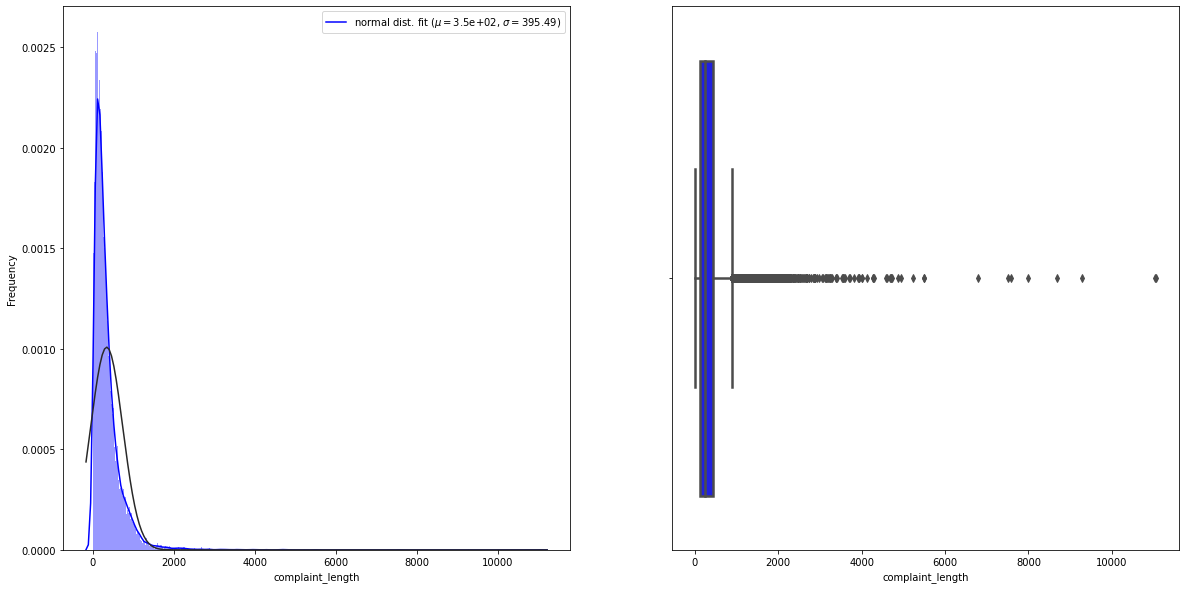

In [47]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(a=df_clean["complaint_length"], bins=1000,kde=True,color='blue', fit=norm)
(mu, sigma) = norm.fit(df_clean["complaint_length"])
plt.legend(["normal dist. fit ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
plt.ylabel('Frequency')
plt.subplot(1,2,2)
sns.boxplot(x=df_clean["complaint_length"],color='blue',linewidth=2.5)

# Top 40 words by frequency

In [48]:
## Your file path will look different
saudia_mask = np.array(Image.open('/content/NLP_ticketing/saudimap.png'))

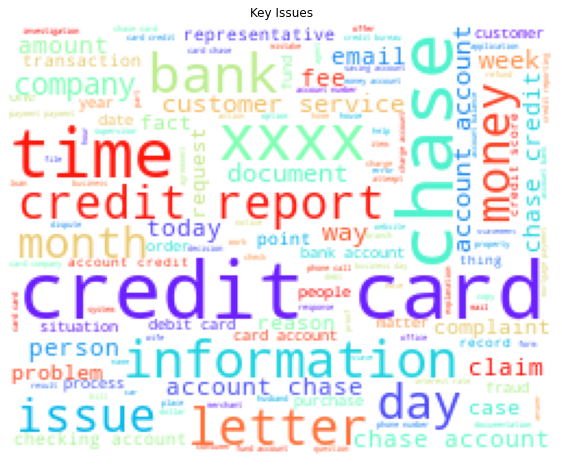

In [49]:
complaint_list = df_clean['complaint_clean'].tolist()
complain_text = ' '.join([s for s in complaint_list])
wordcloud = WordCloud(background_color = 'White', width = 800, height = 400,
                      colormap = 'rainbow', max_words = 180, 
                      max_font_size = 80, 
                      random_state = 0,  mask=saudia_mask,contour_color='#023075',contour_width=3).generate(complain_text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Key Issues")
plt.show()

In [50]:
# Top 40 words
print(list(wordcloud.words_.keys())[:40])

['credit card', 'chase', 'time', 'xxxx', 'bank', 'information', 'letter', 'day', 'credit report', 'issue', 'money', 'month', 'company', 'customer service', 'account account', 'week', 'document', 'way', 'account chase', 'amount', 'person', 'chase account', 'chase credit', 'email', 'claim', 'today', 'fee', 'complaint', 'case', 'reason', 'problem', 'fact', 'request', 'representative', 'checking account', 'point', 'transaction', 'bank account', 'year', 'situation']


# top unigrams,bigrams and trigrams by frequency

In [51]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
def compute_freq_of_(sentence, n_value=1):
  tokens = nltk.word_tokenize(sentence)
  ngrams = nltk.ngrams(tokens, n_value)
  ngram_fdist = nltk.FreqDist(ngrams)
  return ngram_fdist


In [53]:
result = compute_freq_of_(complain_text)

In [54]:
# top 10 words in the unigram
result.most_common(10)

[(('account',), 46144),
 (('chase',), 37664),
 (('credit',), 31784),
 (('card',), 29766),
 (('payment',), 20986),
 (('time',), 15895),
 (('bank',), 15701),
 (('day',), 12811),
 (('charge',), 11998),
 (('money',), 11871)]

In [55]:
# top 30 bigram frequency among the complaints
result_2 = compute_freq_of_(complain_text,2)

In [56]:
result_2.most_common(10)

[(('credit', 'card'), 12441),
 (('credit', 'report'), 3799),
 (('customer', 'service'), 2859),
 (('account', 'account'), 2751),
 (('account', 'chase'), 2549),
 (('chase', 'account'), 2479),
 (('chase', 'credit'), 2469),
 (('checking', 'account'), 2135),
 (('bank', 'account'), 2102),
 (('debit', 'card'), 1850)]

In [57]:
# top 30 trigram frequency among the complaints
result_3 = compute_freq_of_(complain_text,3)

In [58]:
result_3.most_common(10)

[(('chase', 'credit', 'card'), 1758),
 (('credit', 'card', 'account'), 1029),
 (('credit', 'card', 'company'), 956),
 (('credit', 'card', 'credit'), 630),
 (('credit', 'card', 'chase'), 559),
 (('inquiry', 'credit', 'report'), 554),
 (('card', 'credit', 'card'), 532),
 (('account', 'credit', 'card'), 518),
 (('charge', 'credit', 'card'), 395),
 (('credit', 'report', 'credit'), 395)]

# Remove the Customers masked text

In [59]:
df_clean

,complaint_clean,complaint_original,complaint_length
1,morning name bank cardmember service debt veri...,Good morning my name is XXXX XXXX and I apprec...,142
2,card agent anniversary date agent information ...,I upgraded my XXXX XXXX card in XX/XX/2018 and...,105
10,card application identity consent service cred...,Chase Card was reported on XX/XX/2019. However...,67
11,book ticket offer ticket reward card informati...,"On XX/XX/2018, while trying to book a XXXX XX...",355
14,son deposit chase account fund bank account mo...,my grand son give me check for {$1600.00} i de...,141
...,...,...,...
78303,chase card customer decade solicitation credit...,After being a Chase Card customer for well ove...,215
78309,card provider claim purchase protection benefi...,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",582
78310,pay risk consumer chase year banking merchant ...,I am not familiar with XXXX pay and did not un...,583
78311,credit credit card chase freedom xxxx problem ...,I have had flawless credit for 30 yrs. I've ha...,449


In [60]:
df_clean['complaint_clean']= df_clean['complaint_clean'].replace(regex=r'x{2,}', value="")

In [61]:
df_clean.head()

,complaint_clean,complaint_original,complaint_length
1,morning name bank cardmember service debt veri...,Good morning my name is XXXX XXXX and I apprec...,142
2,card agent anniversary date agent information ...,I upgraded my XXXX XXXX card in XX/XX/2018 and...,105
10,card application identity consent service cred...,Chase Card was reported on XX/XX/2019. However...,67
11,book ticket offer ticket reward card informati...,"On XX/XX/2018, while trying to book a XXXX XX...",355
14,son deposit chase account fund bank account mo...,my grand son give me check for {$1600.00} i de...,141


## Feature Extraction
1. Convert the raw texts to a matrix of TF-IDF features
2. Create the Document Term Matrix by transforming the complaints column

In [62]:
vectorizer = TfidfVectorizer(
    min_df=2,
    max_df=0.95,
    ngram_range=(1, 2))

def vectorizer_create(data, vectorizer):

  tfidf = vectorizer.fit_transform(data)
  print(tfidf)
  return tfidf

#### max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words" max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

#### min_df is used for removing terms that appear too infrequently min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [63]:
complaint_list = df_clean['complaint_clean'].tolist()

In [89]:
complaint_list

['morning name bank cardmember service debt verification statement bank debt mail month debt right information consumer chase thank advance help',
 'card agent anniversary date agent information order account anniversary date consent  recording agent',
 'card application identity consent service credit identity applicant',
 'book ticket offer ticket reward card information offer minute screen decision  bank notification screen representative application information offer credit offer account statement ticket account application representative application request application contrary fact credit account name credit report chase information credit report application error',
 'son deposit chase account fund bank account money son check money bank money son check owner country time date check number  claim number',
 'inquiry',
 'notice account debit card branch customer service representative account branch fund deposit place employment bank associate customer service representative fund b

In [64]:
tfidf = vectorizer_create(complaint_list,vectorizer)

  (0, 2758)	0.20584909002295482
  (0, 80798)	0.1974512914578572
  (0, 16460)	0.20942065382107808
  (0, 20880)	0.16740209277770837
  (0, 41594)	0.1637593210283818
  (0, 72871)	0.187730885720044
  (0, 26040)	0.22153813750905674
  (0, 52808)	0.1974512914578572
  (0, 48828)	0.1941185655585727
  (0, 25960)	0.24601803687983392
  (0, 7987)	0.18854926624920107
  (0, 77811)	0.16925170696419897
  (0, 85915)	0.24601803687983392
  (0, 26086)	0.21596883819968513
  (0, 75153)	0.2185984649293499
  (0, 13387)	0.168495334839526
  (0, 7903)	0.23883796128281048
  (0, 54014)	0.16502330604856433
  (0, 53295)	0.21596883819968513
  (0, 38337)	0.09534248405686403
  (0, 2727)	0.1245323112399612
  (0, 80795)	0.12466063219083898
  (0, 15472)	0.03748137424220515
  (0, 20831)	0.08579898156210185
  (0, 41468)	0.061087992331342544
  :	:
  (21071, 47209)	0.12535344475880705
  (21071, 88760)	0.12978731633824314
  (21071, 1102)	0.2078039783185301
  (21071, 42446)	0.10722539112339642
  (21071, 65547)	0.08801940727442893

# Topic Modelling using NMF

In [65]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5 #write the value you want to test out

#keep the random_state =40
nmf_model =  NMF(
    n_components=num_topics,
    init='nndsvd',
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    alpha=0.0,
    tol=1e-4,
    random_state=40
)

In [66]:
W = nmf_model.fit_transform(tfidf) # Document - topic matrix
H = nmf_model.components_ # Topic - Term matrix

feature_names = vectorizer.get_feature_names()

In [67]:
#Print the Top15 words for each of the topics

toplist = 15

def top_words_search(topic, n_top_words):
    return topic.argsort()[:-n_top_words - 1:-1] 

def topic_table_search(cmp, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in tqdm(enumerate(cmp)):
        t = (topic_idx)
        topics[t] = [feature_names[i] for i in top_words_search(topic, n_top_words)]
    return pd.DataFrame(topics)

topic_df = topic_table_search(
    H,
    feature_names,
    toplist
)

topic_df.head(toplist)

0it [00:00, ?it/s]

,0,1,2,3,4
0,account,card,payment,inquiry,charge
1,check,credit,loan,report,transaction
2,bank,credit card,mortgage,credit report,dispute
3,money,chase,chase,credit,chase
4,fund,balance,modification,inquiry credit,claim
5,chase,chase credit,interest,report credit,merchant
6,deposit,card credit,month,report inquiry,fraud
7,branch,account,home,reporting,card
8,account account,card card,payment payment,card inquiry,email
9,day,card account,time,company,letter


In [68]:
#Assign the best topic to each of the cmplaints in Topic Column
list_top = 5 
final =pd.DataFrame()

final = pd.DataFrame(W, columns=[i for i in tqdm(range(num_topics))])

final['Topic_ind'] = final.apply(lambda x: x.idxmax(), axis=1)
final.head(list_top)

  0%|          | 0/5 [00:00<?, ?it/s]

,0,1,2,3,4,Topic_ind
0,0.007575,0.002039,0.010415,0.005656,0.010767,4
1,0.006040,0.009102,0.002280,0.000391,0.007362,1
2,0.000000,0.022572,0.000000,0.009032,0.001903,1
3,0.012011,0.022583,0.002798,0.036672,0.006508,3
4,0.051676,0.000000,0.000000,0.000000,0.000000,0


In [69]:
# add this to clean DF
df_clean['Topic_ind'] = final['Topic_ind']
df_clean.head(list_top)
df_clean = df_clean.dropna()

In [70]:
#Print the first 5 Complaint for each of the Topics
df_clean_grp=df_clean.groupby('Topic_ind').head(list_top)
df_clean_grp.sort_values('Topic_ind')

,complaint_clean,complaint_original,complaint_length,Topic_ind
10,card application identity consent service cred...,Chase Card was reported on XX/XX/2019. However...,67,0.0
58,purchase payment payment closing date statemen...,I made a purchase of {$260.00} on XX/XX/XXXX. ...,306,0.0
15,inquiry,Can you please remove inquiry,7,0.0
17,notice account debit card branch customer serv...,With out notice J.P. Morgan Chase restricted m...,578,0.0
52,roommate chase debit card driver money account...,My roommate was stealing my Chase debit card a...,132,0.0
1,morning name bank cardmember service debt veri...,Good morning my name is XXXX XXXX and I apprec...,142,1.0
2,card agent anniversary date agent information ...,I upgraded my XXXX XXXX card in XX/XX/2018 and...,105,1.0
14,son deposit chase account fund bank account mo...,my grand son give me check for {$1600.00} i de...,141,1.0
21,payment retailer chase pay chase website scam ...,"On XXXX XX/XX/2019, I made a {$300.00} payment...",1037,1.0
26,time attempt inquiry need creditor inquiry rep...,I have reached out to XXXX several times in at...,173,1.0


# Supervised model to predict any new complaints

In [71]:
# we topic model for following

topic_mapping = {
    0 : "Bank Account services",
    1 : "Credit card or prepaid card",
    2 : "Mortgage/Loan",
    3 : "Others",
    4 : "Theft/Dispute Reporting"
}
df_clean['Topic'] = df_clean['Topic_ind'].map(topic_mapping)

In [72]:
df_clean.head()

,complaint_clean,complaint_original,complaint_length,Topic_ind,Topic
1,morning name bank cardmember service debt veri...,Good morning my name is XXXX XXXX and I apprec...,142,1.0,Credit card or prepaid card
2,card agent anniversary date agent information ...,I upgraded my XXXX XXXX card in XX/XX/2018 and...,105,1.0,Credit card or prepaid card
10,card application identity consent service cred...,Chase Card was reported on XX/XX/2019. However...,67,0.0,Bank Account services
11,book ticket offer ticket reward card informati...,"On XX/XX/2018, while trying to book a XXXX XX...",355,3.0,Others
14,son deposit chase account fund bank account mo...,my grand son give me check for {$1600.00} i de...,141,1.0,Credit card or prepaid card


In [73]:
df.columns

Index(['_index', '_type', '_id', '_score', 'tags', 'zip_code', 'complaint_id',
       'issue', 'date_received', 'state', 'consumer_disputed', 'product',
       'company_response', 'company', 'submitted_via', 'date_sent_to_company',
       'company_public_response', 'sub_product', 'timely',
       'complaint_original', 'sub_issue', 'consumer_consent_provided',
       'complaint_clean'],
      dtype='object')

In [74]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data=df_clean[['complaint_original','Topic_ind']]

In [75]:
training_data.head(5)

,complaint_original,Topic_ind
1,Good morning my name is XXXX XXXX and I apprec...,1.0
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,1.0
10,Chase Card was reported on XX/XX/2019. However...,0.0
11,"On XX/XX/2018, while trying to book a XXXX XX...",3.0
14,my grand son give me check for {$1600.00} i de...,1.0


In [76]:
#Write your code to get the Vector count
#Write your code here to transform the word vector to tf-idf
X = training_data.complaint_original.values
y = training_data.Topic_ind.values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=50)

vectoriser = CountVectorizer()
tfIdfTransformer = TfidfTransformer(use_idf=True)

X_train = vectoriser.fit_transform(X_train)
X_train = tfIdfTransformer.fit_transform(X_train).toarray()

X_test = vectoriser.transform(X_test)
X_test = tfIdfTransformer.transform(X_test).toarray()

In [77]:
y_train

array([1., 4., 4., ..., 0., 3., 1.])

In [78]:
# Distribution of topics in dataset
training_data.Topic_ind.value_counts()

0.0    1863
2.0    1743
4.0    1561
1.0    1359
3.0     599
Name: Topic_ind, dtype: int64

In [82]:
def analysis(model):
  model.fit(X_train,y_train)
  y_pred_train = model.predict(X_train)
  y_pred = model.predict(X_test)
  clf_report = classification_report(y_test,y_pred)
  print(F'ACC on train : {accuracy_score(y_train,y_pred_train)}')
  print(F'ACC on test : {accuracy_score(y_test,y_pred)}')
  print(clf_report)

In [83]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs' , penalty = 'l2')


In [84]:
analysis(model)

ACC on train : 0.6711111111111111
ACC on test : 0.24596491228070175
              precision    recall  f1-score   support

         0.0       0.26      0.43      0.32       735
         1.0       0.18      0.08      0.11       543
         2.0       0.25      0.30      0.28       718
         3.0       0.00      0.00      0.00       232
         4.0       0.24      0.20      0.22       622

    accuracy                           0.25      2850
   macro avg       0.19      0.20      0.19      2850
weighted avg       0.22      0.25      0.22      2850



In [85]:
model2 = DecisionTreeClassifier(random_state=72)


In [86]:
analysis(model2)

ACC on train : 0.9967251461988305
ACC on test : 0.22280701754385965
              precision    recall  f1-score   support

         0.0       0.26      0.28      0.27       735
         1.0       0.17      0.16      0.17       543
         2.0       0.27      0.26      0.27       718
         3.0       0.08      0.09      0.09       232
         4.0       0.22      0.21      0.22       622

    accuracy                           0.22      2850
   macro avg       0.20      0.20      0.20      2850
weighted avg       0.22      0.22      0.22      2850



In [87]:
model3 = RandomForestClassifier(n_estimators= 50)


In [88]:
analysis(model3)

ACC on train : 0.9967251461988305
ACC on test : 0.2505263157894737
              precision    recall  f1-score   support

         0.0       0.26      0.48      0.34       735
         1.0       0.21      0.09      0.13       543
         2.0       0.27      0.29      0.28       718
         3.0       0.00      0.00      0.00       232
         4.0       0.23      0.17      0.19       622

    accuracy                           0.25      2850
   macro avg       0.19      0.21      0.19      2850
weighted avg       0.22      0.25      0.22      2850



## Results and Conclusion:

We note high accuracy in Training, while Test results shown significant reductions. The Model parameters and NMF model parameters would require additional improvement to enhance the test predictions.